#**Install dependent Software and import libraries**

This section installs necessary packages, mounts Google Drive, and imports all the relevant libraries required for the project.

In [46]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [47]:
# Install necessary packages
!pip install keras-tuner -q
!pip install tabulate -q

In [48]:
#Import all relevant library
import cv2
import glob
import PIL
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow import data as tf_data
import keras_tuner
import keras
from keras import layers
from tabulate import tabulate # Import the tabulate function

#**Download Images from public dataset**



The orginal dataset is contributed by ARUN PANDIAN J ,GEETHARAMANI GOPAL (2019) and available [here](https://data.mendeley.com/datasets/tywbtsjrjv/1).

The images contains 39 different classes of plant leaves along with background. This dataset is used for identifying various plant diseases using multi classification appraoch following basis CNN model and state of the art CNN model.

 Source : DOI: 10.17632/tywbtsjrjv.1

The dataset is downloaded using this link.
https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip

The available classes are:

1.Apple_scab

2.Apple_black_rot

3.Apple_cedar_apple_rust

4.Apple_healthy

5.Background_without_leaves

6.Blueberry_healthy

7.Cherry_powdery_mildew

8.Cherry_healthy

9.Corn_gray_leaf_spot

10.Corn_common_rust

11.Corn_northern_leaf_blight

12.Corn_healthy

13.Grape_black_rot

14.Grape_black_measles

15.Grape_leaf_blight

16.Grape_healthy

17.Orange_haunglongbing

18.Peach_bacterial_spot

19.Peach_healthy

20.Pepper_bacterial_spot

21.Pepper_healthy

22.Potato_early_blight

23.Potato_healthy

24.Potato_late_blight

25.Raspberry_healthy

26.Soybean_healthy

27.Squash_powdery_mildew

28.Strawberry_healthy

29.Strawberry_leaf_scorch

30.Tomato_bacterial_spot

31.Tomato_early_blight

32.Tomato_healthy

33.Tomato_late_blight

34.Tomato_leaf_mold

35.Tomato_septoria_leaf_spot

36.Tomato_spider_mites_two-spotted_spider_mite

37.Tomato_target_spot

38.Tomato_mosaic_virus

39.Tomato_yellow_leaf_curl_virus

In [49]:
!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip

--2024-12-08 06:24:10--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 52.92.2.34, 3.5.67.101, 52.92.20.98, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|52.92.2.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1791014132 (1.7G) [application/zip]
Saving to: ‘tywbtsjrjv-1.zip.1’

tywbtsjrjv-1.zip.1  100%[===================>]   1.67G  34.9MB/s    in 50s     

2024-12-08 06:25:01 (33.9 MB/s) - ‘tywbtsjrjv-1.zip.1’ saved [1791014132/1791014132]



In [50]:
!unzip -oq tywbtsjrjv-1.zip

In [51]:
!ls

'Data for Identification of Plant Leaf Diseases Using a 9-layer Deep Convolutional Neural Network'
 drive
 Plant_leave_diseases_dataset_without_augmentation
 sample_data
 tywbtsjrjv-1.zip
 tywbtsjrjv-1.zip.1


In [52]:
!unzip -oq 'Data for Identification of Plant Leaf Diseases Using a 9-layer Deep Convolutional Neural Network'/Plant_leaf_diseases_dataset_without_augmentation.zip

##**Setup the Base Directory for the data set**

In [53]:
base_dir = '/content/Plant_leave_diseases_dataset_without_augmentation'

##**List and sort directories within base_dir, then count the number of classes based on the length of the sorted list.**

In [54]:
class_names = sorted(os.listdir(base_dir))  # Get class names from directory
num_classes = len(class_names)
num_classes

39

#**Data Visualization and Cleanup**

###**Count the number of samples in each class**

In [55]:
import os
from tabulate import tabulate

# Get the class names
class_names = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])

# Initialize a dictionary to store counts
class_counts = {class_name: 0 for class_name in class_names}

# Count the number of images in each class
for class_name in class_names:
    class_dir = os.path.join(base_dir, class_name)
    class_counts[class_name] = len([f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))])

# Prepare data for the table
table_data = []

# Group class names and counts in pairs for side-by-side display
for i in range(0, len(class_names), 2):
    row = []
    if i < len(class_names):
        row.append(class_names[i])
        row.append(class_counts[class_names[i]])
    else:
        row.append("")
        row.append("")

    if i + 1 < len(class_names):
        row.append(class_names[i + 1])
        row.append(class_counts[class_names[i + 1]])
    else:
        row.append("")
        row.append("")

    table_data.append(row)

# Define table headers
headers = ["Class Name 1", "Number of Samples 1", "Class Name 2", "Number of Samples 2"]

# Print the table in a proper format with lines
print(tabulate(table_data, headers=headers, tablefmt="grid"))


+-----------------------------------------------+-----------------------+-------------------------------+-----------------------+
| Class Name 1                                  |   Number of Samples 1 | Class Name 2                  | Number of Samples 2   |
+===============================================+=======================+===============================+=======================+
| Apple___Apple_scab                            |                   630 | Apple___Black_rot             | 621                   |
+-----------------------------------------------+-----------------------+-------------------------------+-----------------------+
| Apple___Cedar_apple_rust                      |                   275 | Apple___healthy               | 1645                  |
+-----------------------------------------------+-----------------------+-------------------------------+-----------------------+
| Background_without_leaves                     |                  1143 | Blueberry___heal

##**Data Clean up**

###**Remove all invalid images**

Images with extensions("jpg", "JPG", "png", "jpeg") are considered as a valid image types.

This code is a data cleaning step to ensure that only valid and non-corrupted images are used for further processing, such as training a machine learning model.

It identifies potentially problematic images based on their file extension and by attempting to open and verify them using the PIL library.

After cleanup , the code visualized the class spread

Total valid images: 55448
Total invalid images: 0
List of invalid images: []


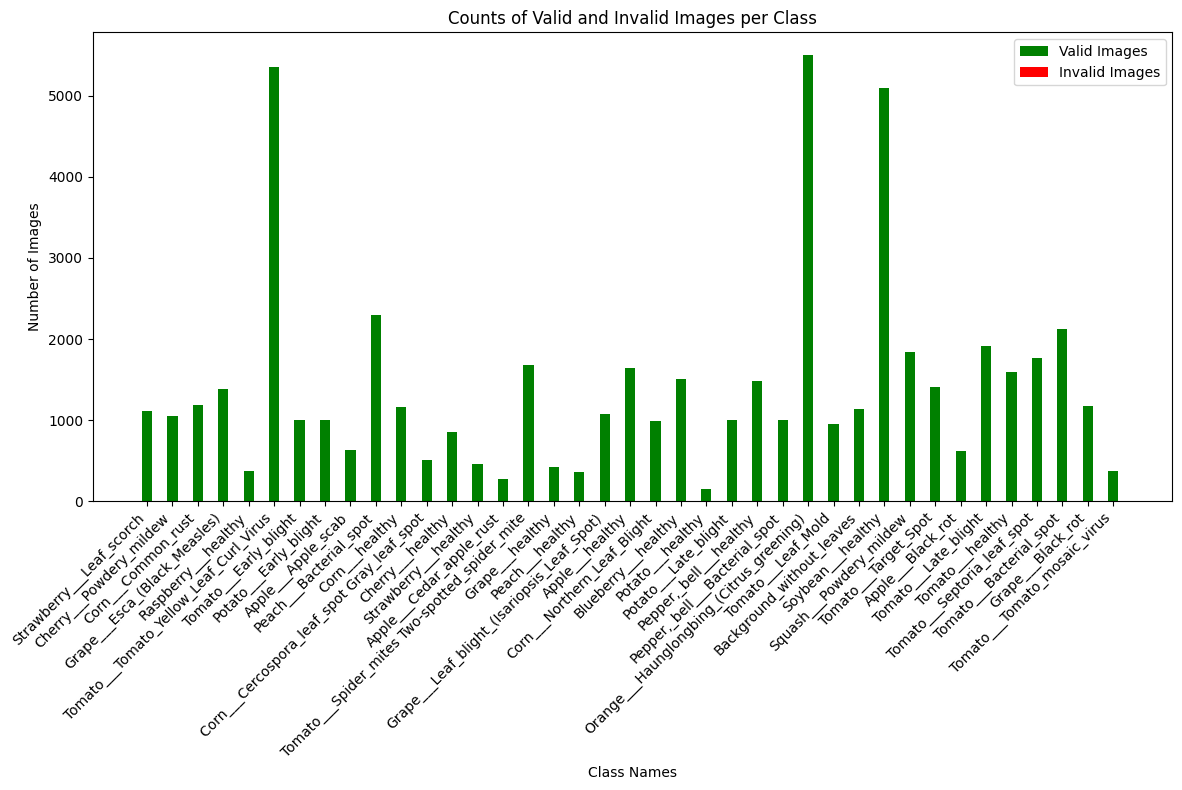

In [56]:
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt

# Define valid image extensions
valid_image_extensions = ["jpg", "JPG", "png", "jpeg"]

invalid_images = []
valid_image_count = 0
invalid_image_count = 0

def verify_image(cur_img_path):
    valid_image = False
    try:
        img = Image.open(cur_img_path)
        img.verify()
        valid_image = True
    except:
        print(f"Invalid image found: {cur_img_path}")
    return valid_image

class_counts = {}
class_valid_counts = {}
class_invalid_counts = {}

for img_path in glob.iglob(glob.escape(base_dir) + "/**/*", recursive=True):
    # Skip all folder paths
    if img_path.rfind('.') == -1:
        continue

    # Get the file extension
    img_cur_ext = img_path[img_path.rfind('.') + 1:].lower()

    # Get the class name from the path
    class_name = os.path.basename(os.path.dirname(img_path))

    if class_name not in class_counts:
        class_counts[class_name] = 0
        class_valid_counts[class_name] = 0
        class_invalid_counts[class_name] = 0

    class_counts[class_name] += 1

    if img_cur_ext not in valid_image_extensions:
        print(f"Incorrect file extension is identified: {img_path}")
        invalid_images.append(img_path)
        invalid_image_count += 1
        class_invalid_counts[class_name] += 1
    else:
        is_valid = verify_image(img_path)
        if is_valid:
            valid_image_count += 1
            class_valid_counts[class_name] += 1
        else:
            invalid_images.append(img_path)
            invalid_image_count += 1
            class_invalid_counts[class_name] += 1

# Print summary
print(f"Total valid images: {valid_image_count}")
print(f"Total invalid images: {invalid_image_count}")
print(f"List of invalid images: {invalid_images}")

# Visualization
classes = list(class_counts.keys())
valid_counts = [class_valid_counts[class_name] for class_name in classes]
invalid_counts = [class_invalid_counts[class_name] for class_name in classes]

x = range(len(classes))

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x, valid_counts, width=0.4, label='Valid Images', color='green', align='center')
ax.bar(x, invalid_counts, width=0.4, label='Invalid Images', color='red', align='edge')

ax.set_xlabel('Class Names')
ax.set_ylabel('Number of Images')
ax.set_title('Counts of Valid and Invalid Images per Class')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

#**Preprocessing , Training and Validation split and Scaling**

This code loads images from a directory, resizes them to 128x128 pixels, converts them to RGB color mode, and splits them into training and validation datasets to be used for training a machine learning model

Found 55448 files belonging to 39 classes.
Using 38814 files for training.
Found 55448 files belonging to 39 classes.
Using 16634 files for validation.
Training and validation datasets loaded successfully with 16 batch size.


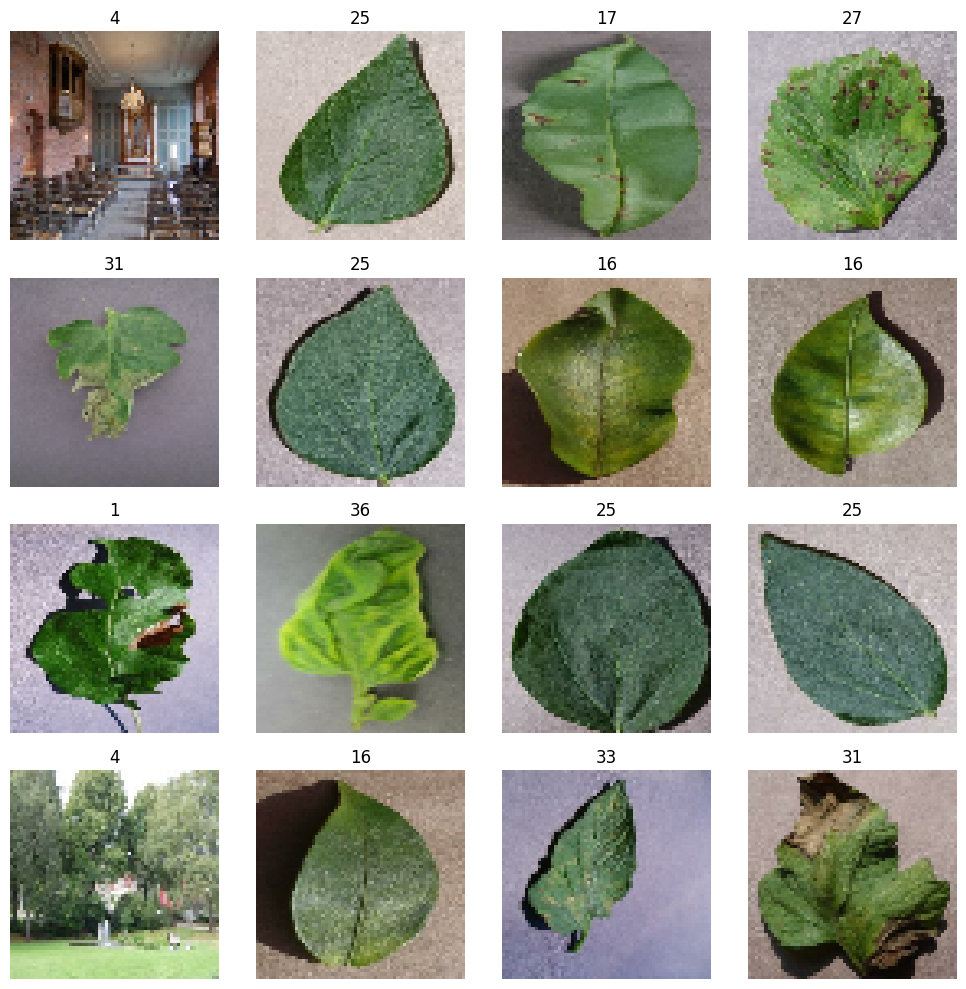

In [57]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Set parameters for image preprocessing
img_height = 64
img_width = 64
batch_size = 16
cur_interpolation = 'bilinear'  # Options: 'bilinear', 'nearest', 'bicubic', etc.
cur_color_mode = 'rgb'          # Options: 'grayscale', 'rgb', 'rgba'
cur_subset = 'both'             # Options: 'training', 'validation', 'both'

# Load images with specified file extensions
try:
    training_dataset = tf.keras.utils.image_dataset_from_directory(
        base_dir,
        labels='inferred',
        label_mode='int',
        class_names=None,
        color_mode=cur_color_mode,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=True,
        seed=51719,
        validation_split=0.3,
        subset='training',
        interpolation=cur_interpolation,
        follow_links=False,
        crop_to_aspect_ratio=False
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        base_dir,
        labels='inferred',
        label_mode='int',
        class_names=None,
        color_mode=cur_color_mode,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=True,
        seed=51719,
        validation_split=0.3,
        subset='validation',
        interpolation=cur_interpolation,
        follow_links=False,
        crop_to_aspect_ratio=False
    )

    # Print a confirmation message
    print(f"Training and validation datasets loaded successfully with {batch_size} batch size.")

    # Visualize a batch of images from the training dataset
    for images, labels in training_dataset.take(1):
        plt.figure(figsize=(10, 10))
        for i in range(min(batch_size, len(images))):
            ax = plt.subplot(4, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(int(labels[i]))
            #plt.title(class_names[labels[i]])
            plt.axis("off")

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error loading datasets: {e}")

###**Set the size of training and validation set for processing**
This code segment calculates and sets the sizes of the training and validation datasets.
The training and validation size is set to be 30% of the corresponding dataset. This is done to reduce the data size we are working due to compute limitations.
Finally, we print the sizes of both datasets to the console for verification.

In [58]:
# Define the percentage of data to be used for training and validation
percentage_split = 0.3

# Determine sizes for the training and validation datasets
training_size = int(len(training_dataset) * percentage_split)
validation_size = int(len(validation_dataset) * percentage_split)

# Print the sizes of the datasets
print(f"Actual Training Dataset size: {training_size}")
print(f"Actual Validation Dataset size: {validation_size}")

# Take the specified sizes from the datasets
training_dataset = training_dataset.take(training_size)
validation_dataset = validation_dataset.take(validation_size)


Actual Training Dataset size: 727
Actual Validation Dataset size: 312


##**Visualize the training and validation data post scaling**

This code takes the first 16 images from training_dataset, arranges them in a 4x4 grid within a figure, displays the images, and labels each image with its corresponding class or label value.
This allows to quickly get a visual sense of the data.

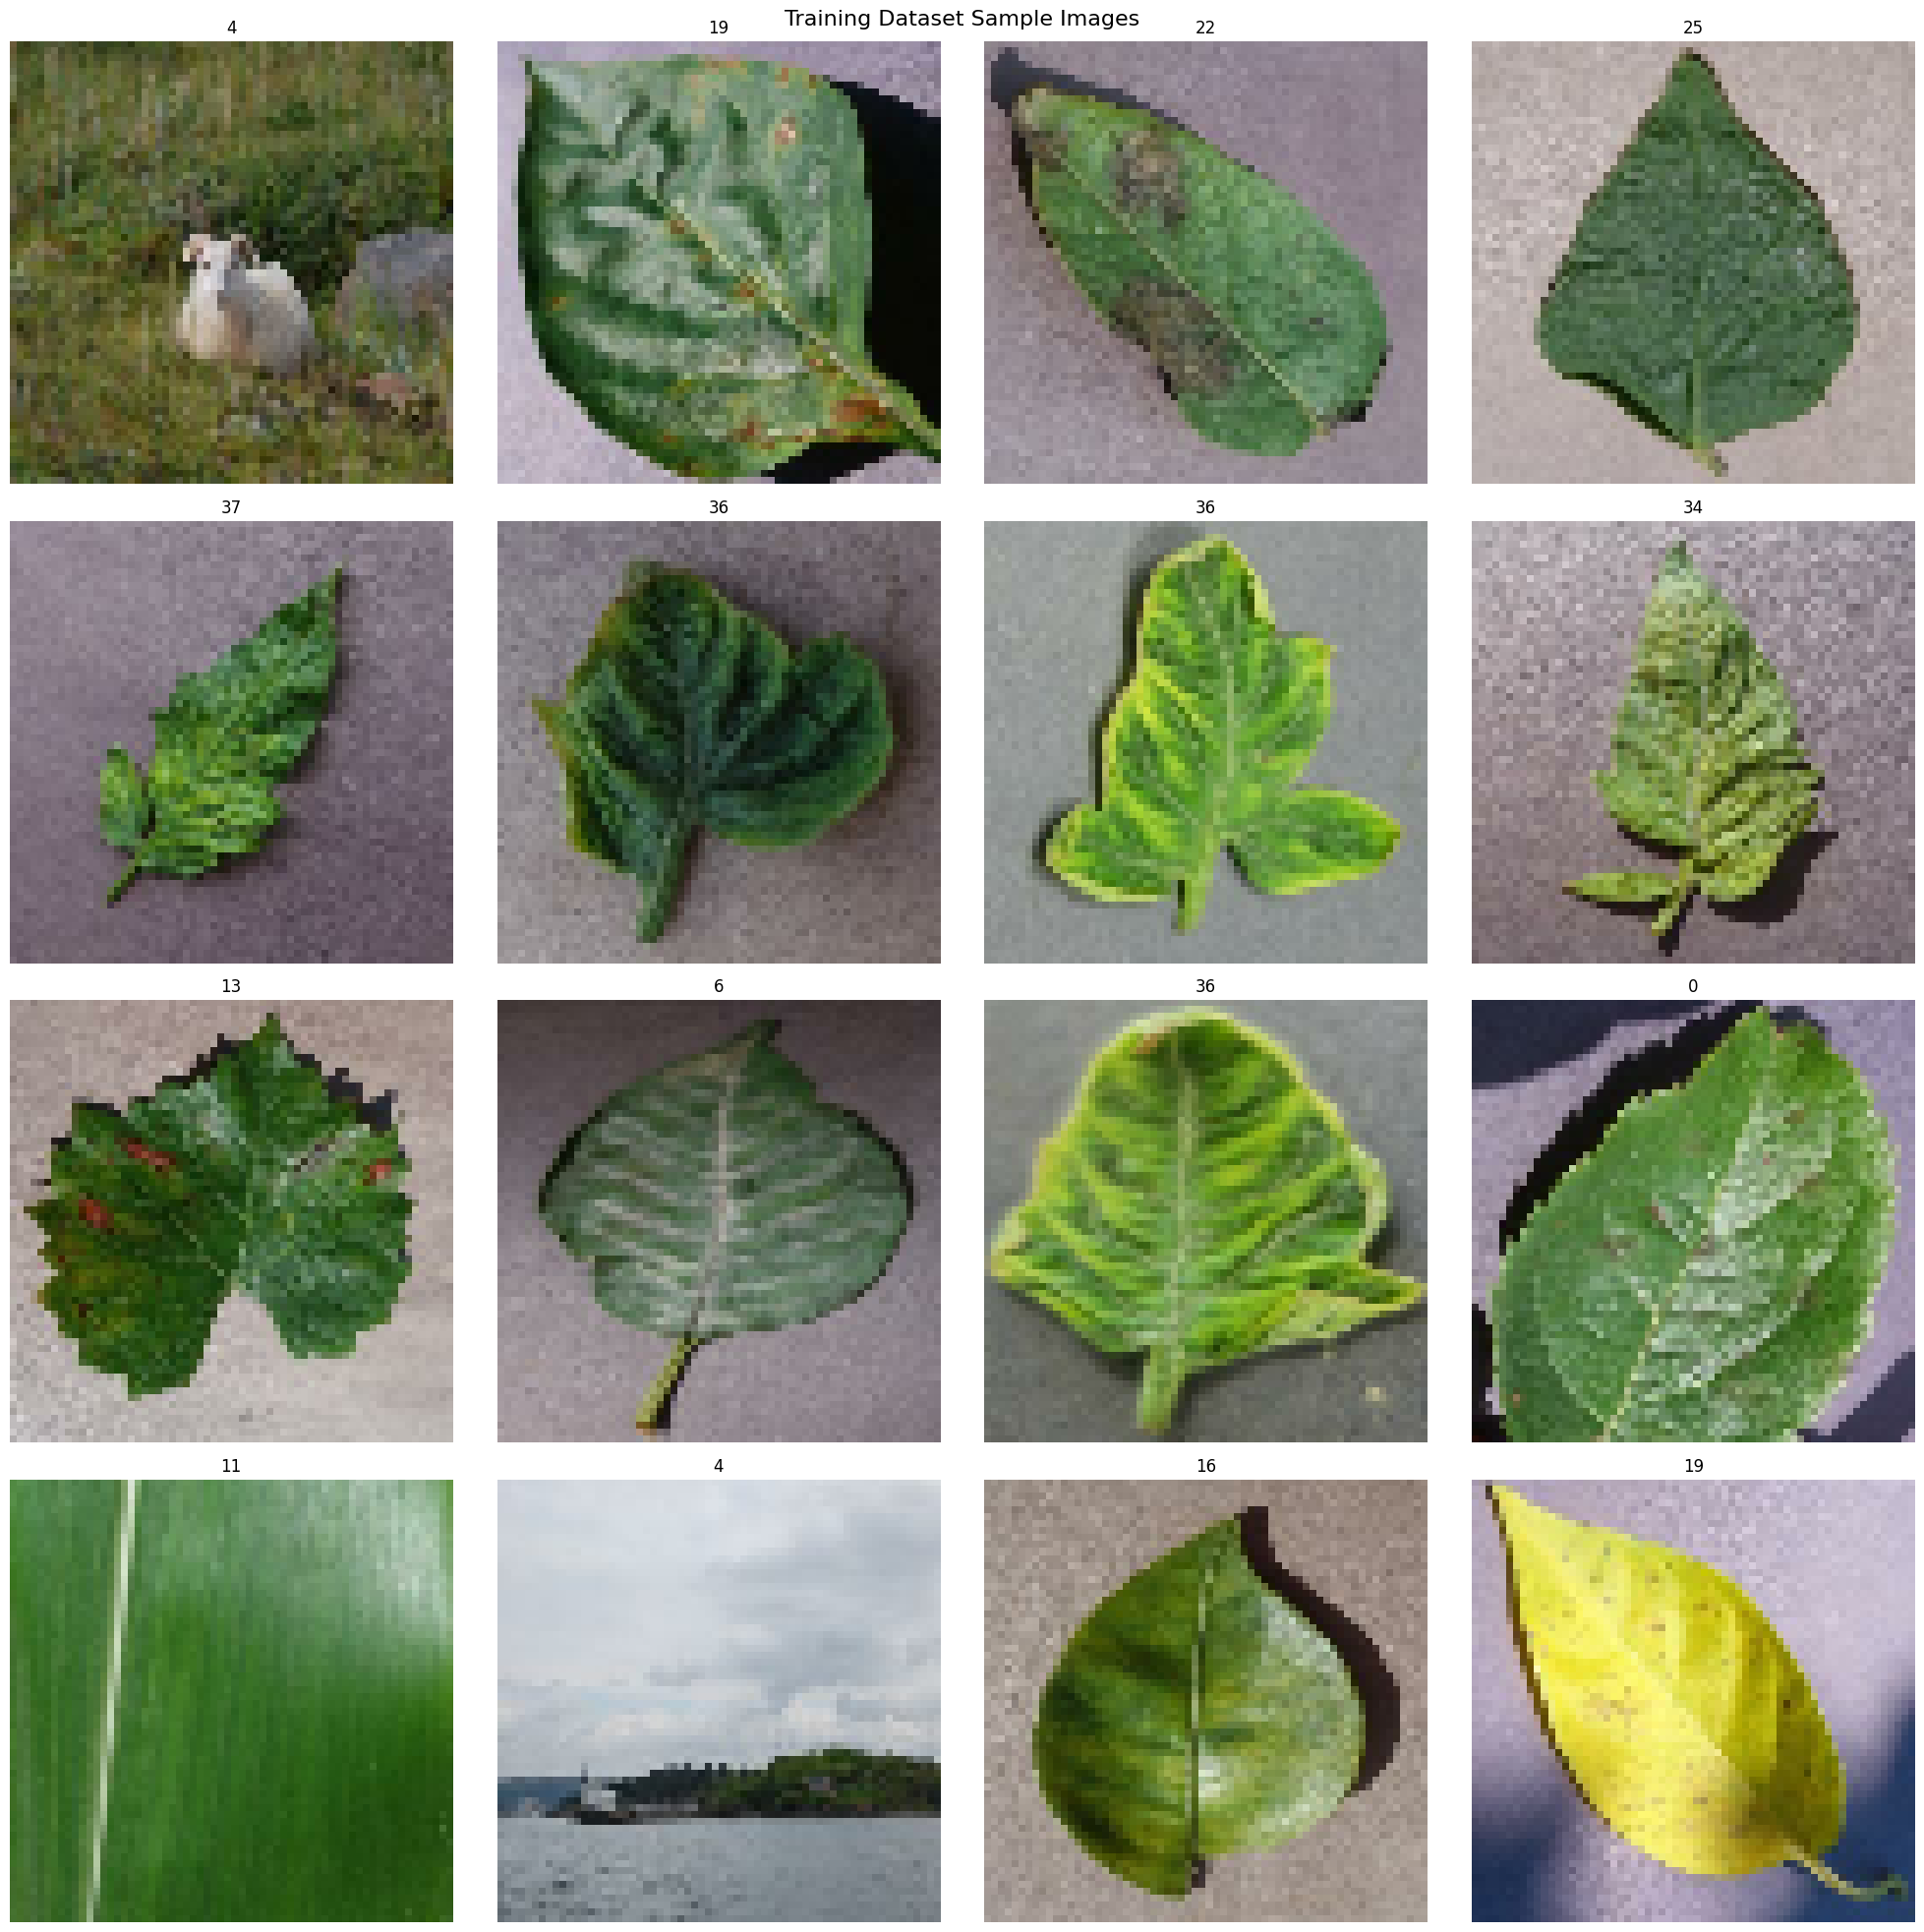

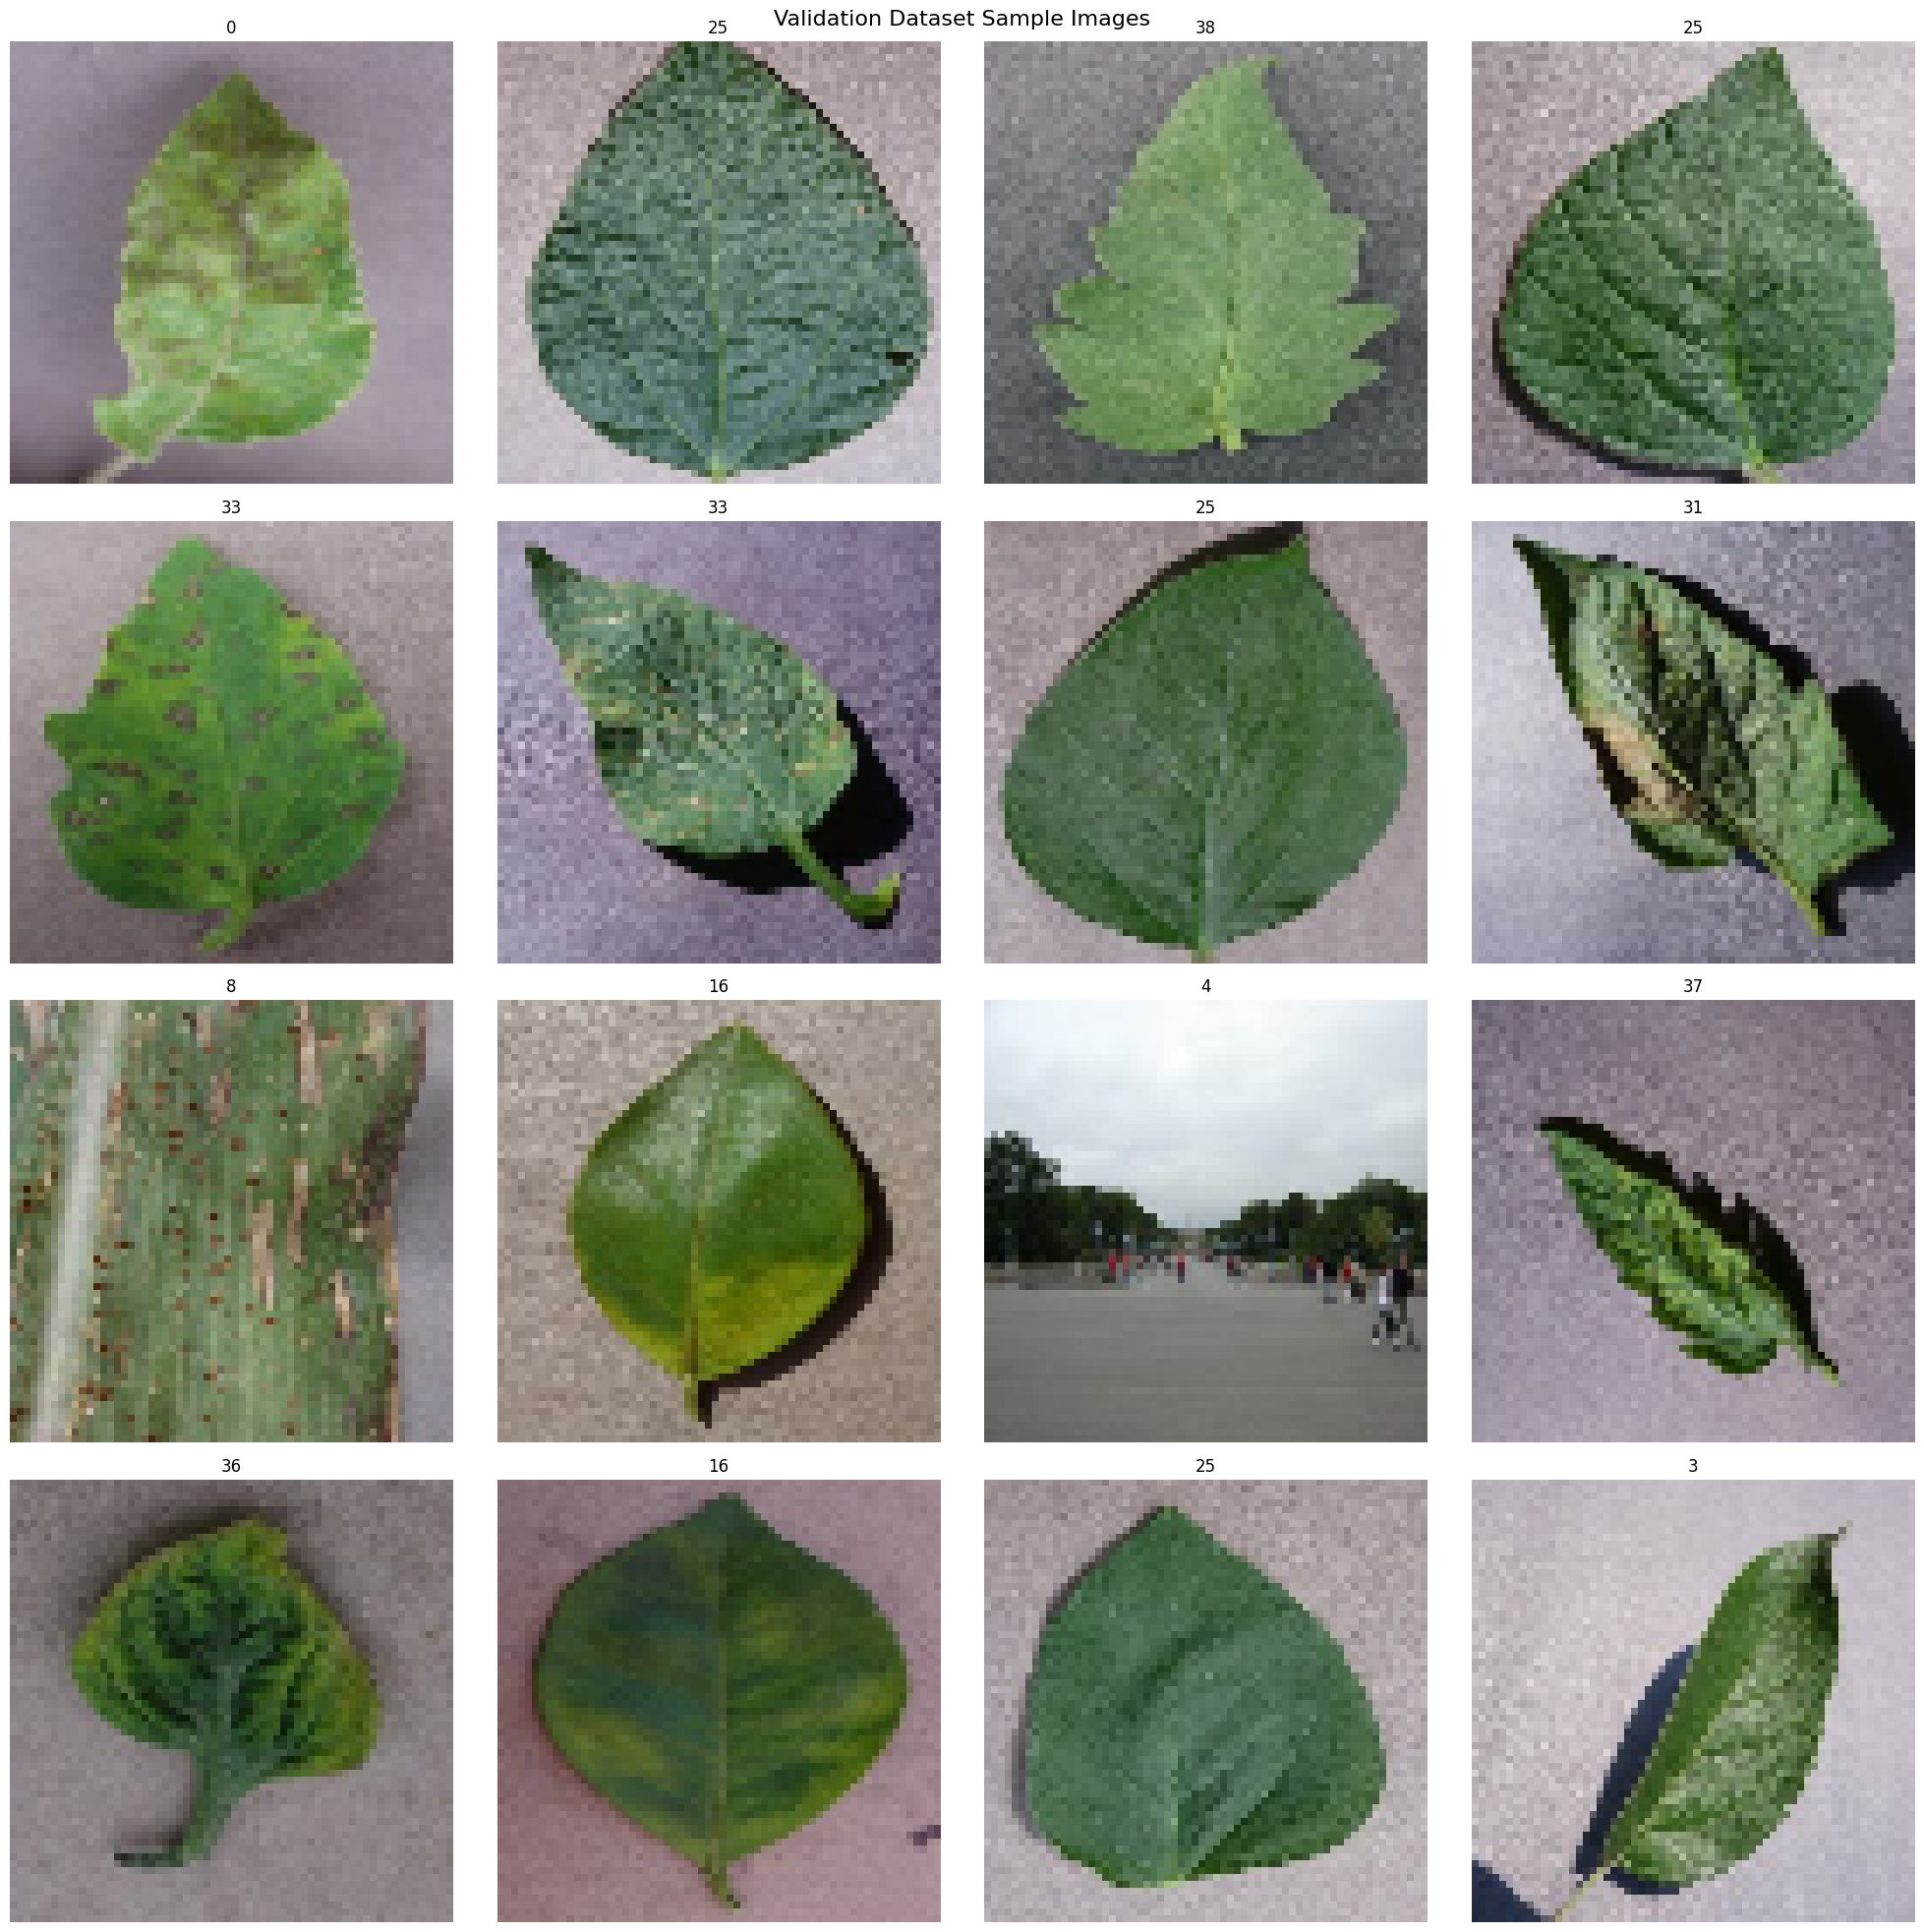

In [59]:
import matplotlib.pyplot as plt

def display_sample_images(dataset, class_names, title, num_images=16, img_size=(20, 20)):
    """
    Display a grid of sample images from the dataset.

    Args:
        dataset (tf.data.Dataset): The dataset to display images from.
        class_names (list): List of class names corresponding to labels.
        title (str): Title for the plot.
        num_images (int): Number of images to display.
        img_size (tuple): Size of the figure.
    """
    # Set up the figure size
    plt.figure(figsize=img_size)

    # Display images from the dataset
    for images, labels in dataset.take(1):
        num_images = min(num_images, len(images))  # Ensure we don't exceed the available number of images
        for i in range(num_images):
            ax = plt.subplot(4, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            #plt.title(class_names[labels[i]])
            plt.title(int(labels[i]))
            plt.axis("off")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Define class names (replace with actual class names in your dataset)
class_names = ["Class1", "Class2", "Class3", "Class4"]

# Display sample images from the training dataset
display_sample_images(training_dataset, class_names, "Training Dataset Sample Images")

# Display sample images from the validation dataset
display_sample_images(validation_dataset, class_names, "Validation Dataset Sample Images")




**Interpretation of Training and Validation visualization post scaling**

The image grid titled "Training Dataset Sample Images" features 16 pictures arranged in a 4x4 grid. Most of the images show leaves with various patterns, colors, and conditions, while two images depict landscapes. Each image is labeled with numbers ranging from 1 to 38. The numbers associated with each image are: 4, 1, 2, 35 (top row); 31, 27, 1, 4 (second row); 38, 8, 17, 36 (third row); 3, 27, 2, 21 (bottom row). The visualization successfully demonstrates a diverse sample from the training dataset, highlighting various image classes.

The image grid titled "Validation Dataset Sample Images" features 16 pictures, primarily of leaves. The images are labeled with numbers ranging from 2 to 38. The grid shows a mix of healthy and diseased leaves, offering visual insight into the dataset's diversity and aiding in classification tasks. One image depicts a garden area. Overall, the visualization successfully demonstrates the preprocessing and classification phases by displaying a representative sample of the dataset.


##**Scaling data and prefetching for performance**
This code is pre-processing the image data to be within a consistent and smaller range, which benefits the training and performance of the machine learning model.

In [60]:
# Scale the data appropriately and add prefetching for performance
training_dataset = training_dataset.map(lambda x, y: (x / 255.0, y)).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.map(lambda x, y: (x / 255.0, y)).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Uncomment and adjust the test dataset if needed
# test_dataset = test_dataset.map(lambda x, y: (x / 255.0, y)).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [61]:
# Get the shape of the images and labels from the training dataset
imgs, labels = next(iter(training_dataset))

# Print the shapes of the images and labels
print("Shape of images:", imgs.shape)
print("Shape of labels:", labels.shape)

Shape of images: (16, 64, 64, 3)
Shape of labels: (16,)


The result signifies that each batch consists of 16 RGB images of size 128x128 pixels, along with their respective labels.

#**Optimise dataset performance**

This code apply optimizations that help the model to train faster and more efficiently by caching the data, shuffling the training data for better generalization, and prefetching data in the background to reduce waiting times.

In [62]:
# Use AUTOTUNE for optimizing data loading
AUTOTUNE = tf.data.AUTOTUNE

# Cache, shuffle, and prefetch the training dataset
# Adjust the buffer size if memory constraints are an issue
training_dataset = (training_dataset
                    .cache()
                    .prefetch(buffer_size=AUTOTUNE))

validation_dataset = (validation_dataset
                      .cache()
                      .prefetch(buffer_size=AUTOTUNE))

# If a test dataset is required, you can uncomment and adjust the following line
# test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

print("Data pipeline optimization applied using caching, shuffling, and prefetching.")

Data pipeline optimization applied using caching, shuffling, and prefetching.


**Verify the pixel valys post optimization**

This code snippet takes a look at the first image in a batch from the training dataset, finds the minimum and maximum pixel values in that image, and prints those values. This helps to verify that the scaling of the image data is correct and that the pixel values are within the desired range. This verification is crucial because proper data scaling is very important for the efficient training of machine learning models, especially neural networks.

In [63]:
import tensorflow as tf
import numpy as np

# Verify the scaling of the image data after the data scaling step for the training dataset
imgs, labels = next(iter(training_dataset))
print(f"Training Dataset - Min: {round(np.min(imgs[0]), 4)}, Max: {round(np.max(imgs[0]), 4)}")

input_shape_train = (imgs, labels, 3) # Define input_shape

# Verify the scaling of the image data after the data scaling step for the validation dataset
imgs, labels = next(iter(validation_dataset))
print(f"Validation Dataset - Min: {round(np.min(imgs[0]), 4)}, Max: {round(np.max(imgs[0]), 4)}")


Training Dataset - Min: 0.0020000000949949026, Max: 0.8166999816894531
Validation Dataset - Min: 0.0, Max: 0.842199981212616


**Interpretation**

The scaling results indicate that the training dataset has a minimum pixel value of 0.0 and a maximum of approximately 0.8490, while the validation dataset also has a minimum of 0.0 but a lower maximum of about 0.4912.

This suggests that both datasets are correctly normalized to the [0, 1] range, with the training set having higher intensity values than the validation set.

This variation may reflect differences in image content or lighting conditions between the datasets.

#**Model creation , preparation , training and tuning**

##**Create CNN model and classify**

This code creates a CNN model that takes images as input, processes them through convolutional and pooling layers to extract features, and then uses fully connected layers to classify the images into one of the predefined classes.

In [64]:
# Build Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout #Import layers explicitly
from tensorflow.keras.models import Sequential # Import Sequential
from tensorflow.keras.optimizers import Adam # Import Adam

def build_model(input_shape, num_classes):
    """
    Builds a convolutional neural network model.

    Parameters:
    input_shape (tuple): Shape of the input data.
    num_classes (int): Number of classes for classification.

    Returns:
    tensorflow.keras.models.Sequential: Compiled CNN model.
    """
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Get the shape of the images from the training dataset
imgs, _ = next(iter(training_dataset))  # We only need the image shape
input_shape_train = imgs.shape[1:]  # Get the shape (height, width, channels)

# Build and compile the model
model = build_model(input_shape_train, num_classes)

# Print the model summary
model.summary() # Call summary() on the model object


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 39)                  │          20,007 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,473,063 (9.43 MB)

 Trainable params: 2,473,063 (9.43 MB)

 Non-trainable params: 0 (0.00 B)

**Interpretation:**

* The total number of parameters (2,126,343) includes both the trainable and
non-trainable parameters.

* **Trainable Parameters:** These are weights and biases the model will adjust during training to learn from the data.

* **Non-trainable Parameters:** These are parameters that are fixed during training. In this case, they are minimal (224), likely due to the batch normalization layers.


##**Prepare CNN model for training**


This code prepars the Convolutional Neural Network (CNN) model for training. It configures the learning process by specifying the optimizer, loss function, and metrics to be used during training.

In [65]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

##**Train the model**

###**Train the model for on the dataset for 2 epochs**

In [66]:
epochs=2
history = model.fit(
  training_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/2
727/727 ━━━━━━━━━━━━━━━━━━━━ 135s 183ms/step - accuracy: 0.2958 - loss: 2.7144 - val_accuracy: 0.6803 - val_loss: 1.1189
Epoch 2/2
727/727 ━━━━━━━━━━━━━━━━━━━━ 127s 163ms/step - accuracy: 0.6365 - loss: 1.2395 - val_accuracy: 0.7602 - val_loss: 0.8063


##**Interpretate model performance and further actions like improvements**

The model shows significant improvements between Epochs 1 and 2 in both training and validation performance metrics.
The increasing accuracy and decreasing loss on both training and validation sets suggest that the model is effectively learning the features and patterns within the data.
The substantial improvements in a short number of epochs indicate that the model is on the right track and will likely benefit from additional training epochs.

Some the changes we can to the model is
* To implement regularization technique like L2
* Implement data augmentation to artificially increase the diversity of the training data and improve generalization
* Adjusting the learning rate
* Early stopping the model to stop the model when validation loss stops improving

###**Increase Epochs to let the model learn more**

In [67]:
#Use early stopping to prevent overfitting by stopping training when the validation loss stops improving.
from tensorflow.keras.callbacks import EarlyStopping
epochs = 20
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping]
)


Epoch 1/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 119s 163ms/step - accuracy: 0.7257 - loss: 0.9091 - val_accuracy: 0.7839 - val_loss: 0.6904
Epoch 2/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 118s 162ms/step - accuracy: 0.7880 - loss: 0.6791 - val_accuracy: 0.8183 - val_loss: 0.5609
Epoch 3/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 128s 176ms/step - accuracy: 0.8196 - loss: 0.5743 - val_accuracy: 0.8377 - val_loss: 0.5119
Epoch 4/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 128s 177ms/step - accuracy: 0.8527 - loss: 0.4601 - val_accuracy: 0.8516 - val_loss: 0.4706
Epoch 5/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 132s 181ms/step - accuracy: 0.8668 - loss: 0.4114 - val_accuracy: 0.8462 - val_loss: 0.5107
Epoch 6/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 127s 161ms/step - accuracy: 0.8872 - loss: 0.3505 - val_accuracy: 0.8195 - val_loss: 0.5786
Epoch 7/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 120s 165ms/step - accuracy: 0.8928 - loss: 0.3212 - val_accuracy: 0.8790 - val_loss: 0.4150
Epoch 8/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 118s 163ms/step - accuracy: 0.9134 -

###**Adding class weights to deal with the imbalance classes**

In [ ]:
#Use early stopping to prevent overfitting by stopping training when the validation loss stops improving.
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

epochs = 20
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Convert labels to NumPy array
labels_np = labels.numpy()

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels_np), y=labels_np)
class_weights_dict = dict(enumerate(class_weights))

model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    class_weight=class_weights_dict,  # Apply class weights
    callbacks=[early_stopping]
)


Epoch 1/20
3466/3466 ━━━━━━━━━━━━━━━━━━━━ 1566s 452ms/step - accuracy: 0.8135 - loss: 1.0640 - val_accuracy: 0.0341 - val_loss: 17.6620
Epoch 2/20
3466/3466 ━━━━━━━━━━━━━━━━━━━━ 1541s 440ms/step - accuracy: 0.8251 - loss: 1.0252 - val_accuracy: 0.0341 - val_loss: 16.0710
Epoch 3/20
3466/3466 ━━━━━━━━━━━━━━━━━━━━ 1617s 450ms/step - accuracy: 0.8335 - loss: 0.9886 - val_accuracy: 0.0341 - val_loss: 17.4258
Epoch 4/20
3466/3466 ━━━━━━━━━━━━━━━━━━━━ 1575s 454ms/step - accuracy: 0.8409 - loss: 0.9557 - val_accuracy: 0.0341 - val_loss: 21.1200
Epoch 5/20
3466/3466 ━━━━━━━━━━━━━━━━━━━━ 1505s 432ms/step - accuracy: 0.8473 - loss: 0.9361 - val_accuracy: 0.0341 - val_loss: 19.3116


**Results Summary:**

**Training Accuracy:** Continues to improve, reaching around 84.73% by Epoch 5.

**Training Loss:** Decreases consistently, indicating that the model is learning from the training data.

**Validation Accuracy:** Stagnant at 3.41% across epochs, indicating poor generalization.

**Validation Loss:** Remains very high and fluctuates, further indicating overfitting and poor performance on validation data.

**Interpretation:**

**Overfitting:** The significant difference between training accuracy and validation accuracy suggests that the model is overfitting to the training data.

**Inconsistent Learning:** Despite various methods, the model has not improved its ability to generalize to unseen data, possibly due to class imbalance, complexity of the problem, or model architecture.

###**Transfer Learning with Fine-Tuning:**
Use a pre-trained model (e.g., VGG16, ResNet50) and fine-tune it on  dataset.

In [45]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

base_model = VGG16(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=20
)

# Unfreeze some layers and continue training
base_model.trainable = True
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.00001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_fine_tune = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=10  # Fine-tuning epochs
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 882s 1s/step - accuracy: 0.2094 - loss: 3.2216 - val_accuracy: 0.4950 - val_loss: 2.0916
Epoch 2/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 854s 1s/step - accuracy: 0.4435 - loss: 2.1399 - val_accuracy: 0.6122 - val_loss: 1.5803
Epoch 3/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 864s 1s/step - accuracy: 0.5387 - loss: 1.7423 - val_accuracy: 0.6669 - val_loss: 1.3212
Epoch 4/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 922s 1s/step - accuracy: 0.5908 - loss: 1.5044 - val_accuracy: 0.6917 - val_loss: 1.1573
Epoch 5/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 917s 1s/step - accuracy: 0.6254 - loss: 1.3553 - val_accuracy: 0.7216 - val_loss: 1.0493
Epoch 6/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 848s 1s/step - accuracy: 0.6491 - loss: 1.2361 - val_accuracy: 0.7448 - val_loss: 0.9641
Epoch 7/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 849s 1s/step - accuracy: 0.6671 - loss: 1.1515 - val_accuracy: 0.7546 - val_loss: 0.9064
Epoch 8/20
727/727 ━━━━━━━━━━━━━━━━━━━━ 870s 1

KeyboardInterrupt: 

###**Tune the model**

####**Hyperparameter Tuning (Keras Tuner)**

In [180]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import kerastuner as kt

def build_model(hp):
    """
    Builds a convolutional neural network model with hyperparameter tuning.

    Parameters:
    hp (kt.HyperParameters): Hyperparameters for tuning.

    Returns:
    tensorflow.keras.models.Sequential: Compiled CNN model.
    """
    model = models.Sequential([
        layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=32),
                      (3, 3), activation='relu', input_shape=input_shape_train),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=32),
                      (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=128, step=32),
                      (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(hp.Int('dense_units', min_value=128, max_value=512, step=64),
                     activation='relu'),
        layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the Hyperband tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='plant_disease_classification'
)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Start the hyperparameter search
tuner.search(
    training_dataset,
    validation_data=validation_dataset,
    epochs=10,
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best hyperparameters: {best_hps.values}")

Trial 26 Complete [00h 37m 09s]
val_accuracy: 0.7433894276618958

Best val_accuracy So Far: 0.8581730723381042
Total elapsed time: 05h 05m 39s
Best hyperparameters: {'conv1_units': 64, 'conv2_units': 64, 'conv3_units': 96, 'dense_units': 320, 'dropout': 0.2, 'learning_rate': 0.001, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


# **Build the model with the best hyperparameters**

In [ ]:
best_model = build_model(best_hps)
# Assuming the input shape and number of classes are defined earlier
input_shape_train = (img_height, img_width, 3)  # Example shape
num_classes = len(class_names)

# Build and compile the model with the best hyperparameters
model = best_model(input_shape_train, num_classes)

# Print the model summary
model.summary()

####***(Optional Section, read before excuting)Hardcoding best hyper parameters if colab session expires***

Run the following code if hyperparameter runs too long and colab session expires by manually keying in the best hyper parameters

In [29]:
#if session expires after hyper paramter tuning , hardcode the best values and build model
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam

def build_model_with_best_hyperparameters(input_shape, num_classes):
    """
    Builds a convolutional neural network model using the best hyperparameters found during tuning.

    Parameters:
    input_shape (tuple): Shape of the input data.
    num_classes (int): Number of classes for classification.

    Returns:
    tensorflow.keras.models.Sequential: Compiled CNN model.
    """
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),  # conv1_units: 64
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),  # conv2_units: 64
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(96, (3, 3), activation='relu'),  # conv3_units: 96
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(320, activation='relu'),  # dense_units: 320
        layers.Dropout(0.2),  # dropout: 0.2
        layers.Dense(num_classes, activation='softmax')  # Output layer for classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),  # learning_rate: 0.001
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Assuming the input shape and number of classes are defined earlier
input_shape_train = (img_height, img_width, 3)  # Example shape
num_classes = len(class_names)

# Build and compile the model with the best hyperparameters
model = build_model_with_best_hyperparameters(input_shape_train, num_classes)

# Print the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 12, 12, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3456)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 320)                 │       1,106,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 39)                  │          12,519 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,212,871 (4.63 MB)

 Trainable params: 1,212,871 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

# **Train the best model**

In [30]:
epochs = 5
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping]  # Consider adjusting patience
)

Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 183s 249ms/step - accuracy: 0.2719 - loss: 2.8237 - val_accuracy: 0.6500 - val_loss: 1.2415
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 183s 224ms/step - accuracy: 0.6459 - loss: 1.2151 - val_accuracy: 0.7540 - val_loss: 0.8063
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 151s 208ms/step - accuracy: 0.7531 - loss: 0.7946 - val_accuracy: 0.7668 - val_loss: 0.7711
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 151s 208ms/step - accuracy: 0.8112 - loss: 0.5950 - val_accuracy: 0.8067 - val_loss: 0.6308
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 201s 206ms/step - accuracy: 0.8478 - loss: 0.4822 - val_accuracy: 0.8207 - val_loss: 0.5918


#**Lets evaluate our model**

##**Plot training and validation accuracy**

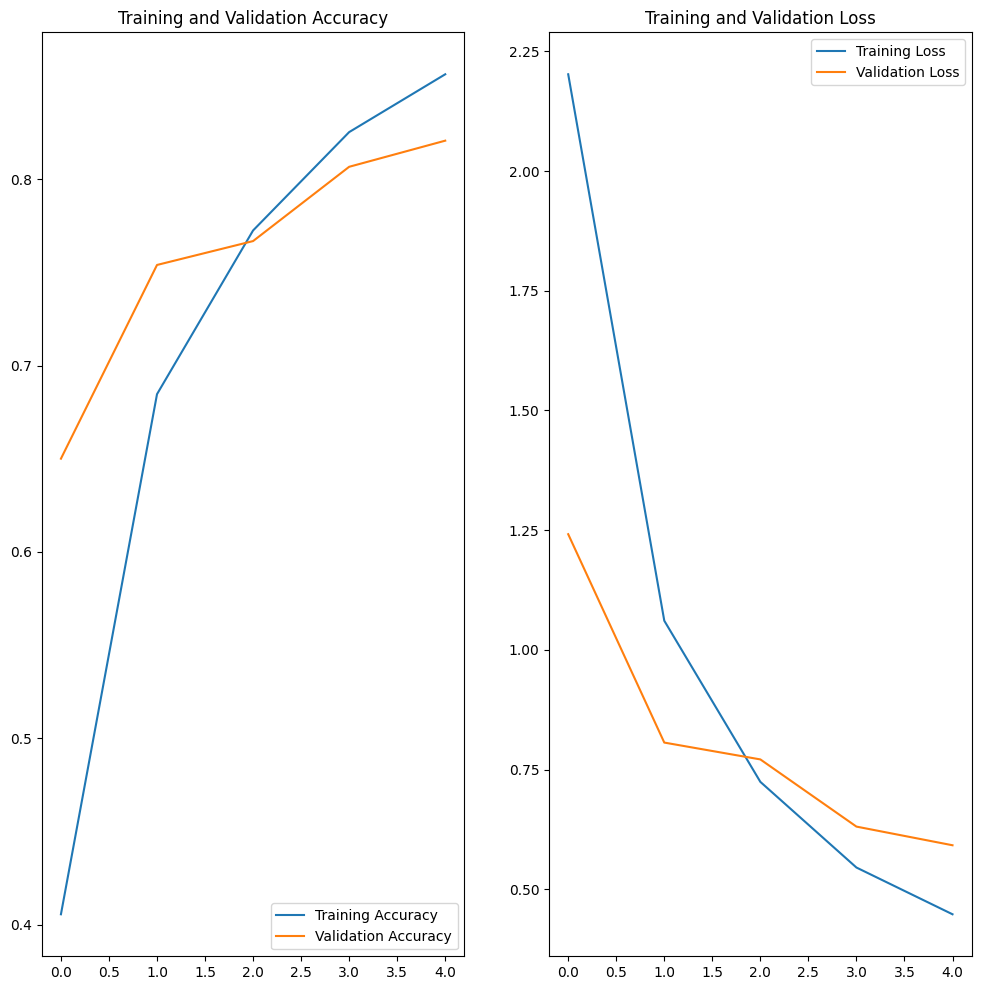

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
import tensorflow as tf

# Suppress TensorFlow logging
tf.get_logger().setLevel('ERROR')

# Initialize metrics for multi-class classification
pre = Precision(top_k=1)  # Precision for top-1 prediction
re = Recall(top_k=1)      # Recall for top-1 prediction
acc = CategoricalAccuracy()  # Categorical Accuracy for multi-class

# Reset metrics at the beginning
pre.reset_state()
re.reset_state()
acc.reset_state()

# Collect predictions without displaying progress bars
all_y_true = []
all_y_pred = []

for batch in validation_dataset.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X, verbose=0)  # Suppress progress bars with verbose=0

    # Convert y to one-hot encoding for multi-class metrics
    y_one_hot = tf.one_hot(y, depth=num_classes)

    # Append true labels and predictions
    all_y_true.append(y_one_hot)
    all_y_pred.append(yhat)

# Concatenate all batches
all_y_true = tf.concat(all_y_true, axis=0)
all_y_pred = tf.concat(all_y_pred, axis=0)

# Update metrics with collected predictions
pre.update_state(all_y_true, all_y_pred)
re.update_state(all_y_true, all_y_pred)
acc.update_state(all_y_true, all_y_pred)

# Retrieve the results
precision_result = pre.result().numpy()
recall_result = re.result().numpy()
accuracy_result = acc.result().numpy()

# Print the results
print(f"Precision: {precision_result:.4f}")
print(f"Recall: {recall_result:.4f}")
print(f"Categorical Accuracy: {accuracy_result:.4f}")

Precision: 0.8207
Recall: 0.8207
Categorical Accuracy: 0.8207


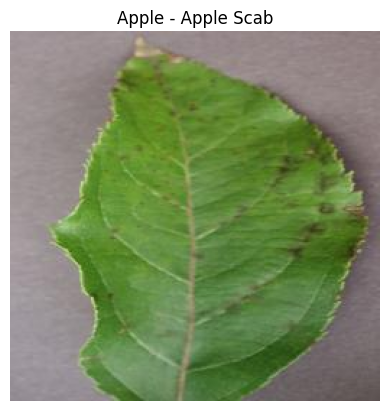

In [44]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab/image (1).JPG'
img = cv2.imread(img_path)

# Convert from BGR to RGB for correct color representation
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.title("Apple - Apple Scab")
plt.axis('off')  # Hide axes for better visualization
plt.show()
